# Figures for Basic Processor Interface and Memory

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import xilinxutils
import xilinxutils.timing
import importlib
importlib.reload(xilinxutils)
importlib.reload(xilinxutils.timing)
from xilinxutils.timing import TimingDiagram, SigTimingInfo, ClkSig

## AXI4-Lite Timing

First we show an example where the address and data are set at different times.

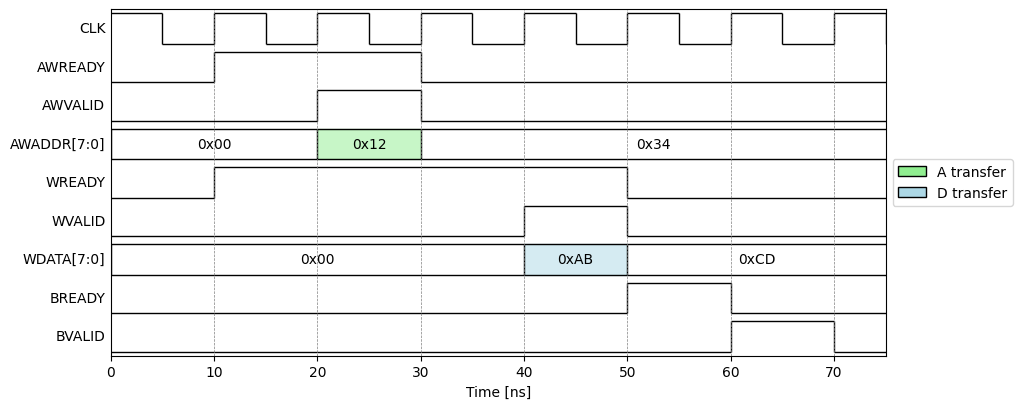

In [53]:
ncycles = 8
clk_period = 10
clk = ClkSig(clk_name="CLK", period=clk_period, ncycles=ncycles)
p = clk.clk_periods()


irdy = 1  # Clock cycle to set addr and data ready
iaddr = 2  # Clock cycle to set address
idat = 4   # Clock cycle to set data

# Setting the address
awready = SigTimingInfo(
    name= "AWREADY",
    times = [p[0], p[irdy], p[iaddr+1]],
    values = ['0', '1', '0'],
)
awvalid = SigTimingInfo(
    name= "AWVALID",
    times = [p[0], p[iaddr],p[iaddr+1]],
    values = ['0', '1', '0'],
)
awaddr = SigTimingInfo(
    name= "AWADDR[7:0]",
    times = [p[0], p[iaddr], p[iaddr+1]],
    values = ['0x00', '0x12', '0x34']
)

# Setting the data
wready = SigTimingInfo(
    name= "WREADY",
    times = [p[0], p[irdy], p[idat+1]],
    values = ['0', '1', '0'],
)
wvalid = SigTimingInfo(
    name= "WVALID",
    times = [p[0], p[idat], p[idat+1]],
    values = ['0', '1', '0'],
)
wdata = SigTimingInfo(
    name= "WDATA[7:0]",
    times = [p[0], p[idat], p[idat+1]],
    values = ['0x00', '0xAB', '0xCD']
)

# BREADY and BVALID
iend = max(iaddr+1, idat+1)  # Finish after last of addr or data
bready = SigTimingInfo(
    name= "BREADY",
    times = [p[0], p[iend], p[iend+1]],
    values = ['0', '1', '0']
)
bvalid = SigTimingInfo(
    name= "BVALID",
    times = [p[0], p[iend+1], p[iend+2]],
    values = ['0', '1', '0'],
)

td = TimingDiagram()
td.add_signals([clk, awready, awvalid, awaddr])
td.add_signals([clk, wready, wvalid, wdata])
td.add_signals([bready,bvalid])
ax = td.plot_signals()
td.add_patch(sig_name="AWADDR[7:0]", ind=1, color='lightgreen', alpha=0.5)
td.add_patch(sig_name="WDATA[7:0]", ind=1, color='lightblue', alpha=0.5)
ax.set_xlabel("Time [ns]")

# Add legend
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='A transfer'),
    Patch(facecolor='lightblue', edgecolor='black', label='D transfer')
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))



Next, we show one when the slave is not ready

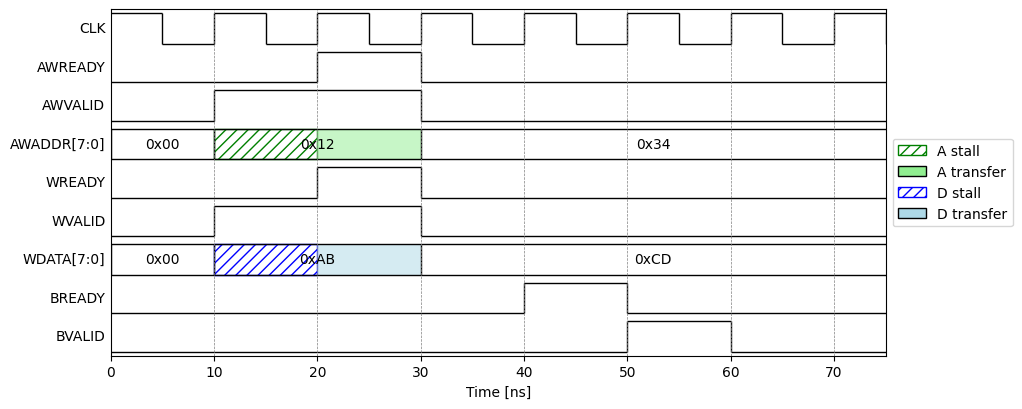

In [63]:
ncycles = 8
clk_period = 10
clk = ClkSig(clk_name="CLK", period=clk_period, ncycles=ncycles)
p = clk.clk_periods()


irdy = 2  # Clock cycle to set addr and data ready
iaddr = 1  # Clock cycle to set address
idat = 1   # Clock cycle to set data
ardyend = max(irdy, iaddr) + 1
drdyend = max(irdy, idat) + 1


# Setting the address
awready = SigTimingInfo(
    name= "AWREADY",
    times = [p[0], p[irdy], p[ardyend]],
    values = ['0', '1', '0'],
)
awvalid = SigTimingInfo(
    name= "AWVALID",
    times = [p[0], p[iaddr],p[ardyend]],
    values = ['0', '1', '0'],
)
awaddr = SigTimingInfo(
    name= "AWADDR[7:0]",
    times = [p[0], p[iaddr], p[ardyend]],
    values = ['0x00', '0x12', '0x34']
)

# Setting the data
wready = SigTimingInfo(
    name= "WREADY",
    times = [p[0], p[irdy], p[drdyend]],
    values = ['0', '1', '0'],
)
wvalid = SigTimingInfo(
    name= "WVALID",
    times = [p[0], p[idat], p[drdyend]],
    values = ['0', '1', '0'],
)
wdata = SigTimingInfo(
    name= "WDATA[7:0]",
    times = [p[0], p[idat], p[drdyend]],
    values = ['0x00', '0xAB', '0xCD']
)

# BREADY and BVALID
iend = max(drdyend+1, ardyend+1)  # Finish after last of addr or data
bready = SigTimingInfo(
    name= "BREADY",
    times = [p[0], p[iend], p[iend+1]],
    values = ['0', '1', '0']
)
bvalid = SigTimingInfo(
    name= "BVALID",
    times = [p[0], p[iend+1], p[iend+2]],
    values = ['0', '1', '0'],
)

td = TimingDiagram()
td.add_signals([clk, awready, awvalid, awaddr])
td.add_signals([clk, wready, wvalid, wdata])
td.add_signals([bready,bvalid])
ax = td.plot_signals()
td.add_patch(sig_name="AWADDR[7:0]", time=[p[iaddr],p[iaddr+1]], 
             facecolor='none', edgecolor='green', hatch='///')
td.add_patch(sig_name="AWADDR[7:0]", time=[p[iaddr+1],p[iaddr+2]], 
             color='lightgreen', alpha=0.5)
td.add_patch(sig_name="WDATA[7:0]", time=[p[idat],p[idat+1]], 
             facecolor='none', edgecolor='blue', hatch='///')
td.add_patch(sig_name="WDATA[7:0]", time=[p[idat+1],p[idat+2]], 
             facecolor='lightblue', alpha=0.5)
ax.set_xlabel("Time [ns]")

# Add legend
legend_elements = [
    Patch(facecolor='none', edgecolor='green', label='A stall', hatch='///'),
    Patch(facecolor='lightgreen', edgecolor='black', label='A transfer'),
    Patch(facecolor='none', edgecolor='blue', label='D stall', hatch='///'),
    Patch(facecolor='lightblue', edgecolor='black', label='D transfer')
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))



## Read Figures

Text(0.5, 0, 'Time [ns]')

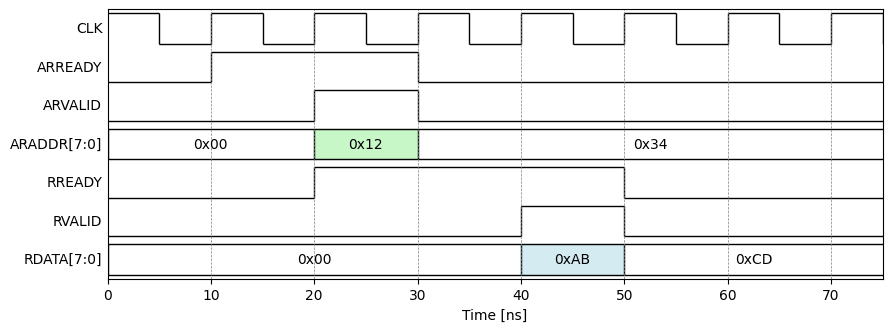

In [5]:
ncycles = 8
clk_period = 10
clk = ClkSig(clk_name="CLK", period=clk_period, ncycles=ncycles)
p = clk.clk_periods()


irdy = 1   # Clock cycle to set ARREADY and data ready
iaddr = 2  # Clock cycle to set ARADDR and ARVALID
idat = 4   # Clock cycle to set RDATA and RVALID

# Setting the address
arready = SigTimingInfo(
    name= "ARREADY",
    times = [p[0], p[irdy], p[iaddr+1]],
    values = ['0', '1', '0'],
)
arvalid = SigTimingInfo(
    name= "ARVALID",
    times = [p[0], p[iaddr],p[iaddr+1]],
    values = ['0', '1', '0'],
)
araddr = SigTimingInfo(
    name= "ARADDR[7:0]",
    times = [p[0], p[iaddr], p[iaddr+1]],
    values = ['0x00', '0x12', '0x34']
)

# Setting the data
rvalid = SigTimingInfo(
    name= "RVALID",
    times = [p[0], p[idat], p[idat+1]],
    values = ['0', '1', '0'],
)
rdata = SigTimingInfo(
    name= "RDATA[7:0]",
    times = [p[0], p[idat], p[idat+1]],
    values = ['0x00', '0xAB', '0xCD']
)

# Reading the data
rready = SigTimingInfo(
    name= "RREADY",
    times = [p[0], p[irdy+1], p[idat+1]],
    values = ['0', '1', '0'],
)

td = TimingDiagram()
td.add_signals([clk, arready, arvalid, araddr])
td.add_signals([clk, rready, rvalid, rdata])
ax = td.plot_signals()

td.add_patch(sig_name="ARADDR[7:0]", ind=1, color='lightgreen', alpha=0.5)
td.add_patch(sig_name="RDATA[7:0]", ind=1, color='lightblue', alpha=0.5)
ax.set_xlabel("Time [ns]")

In [ ]:
# RE